Image dimensions: 128x128 pixels


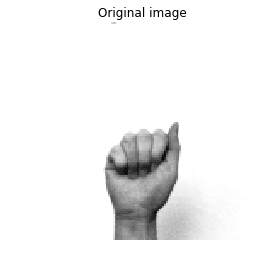

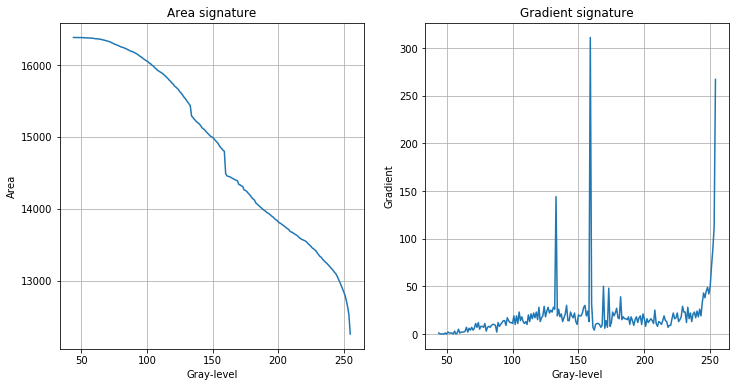

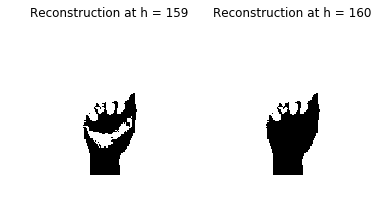

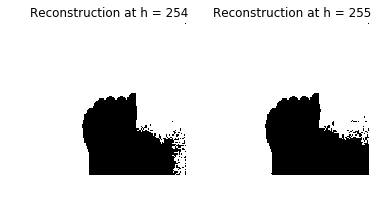

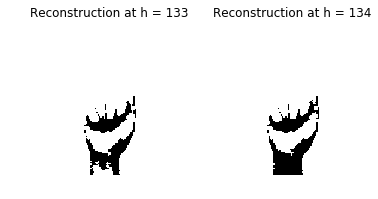

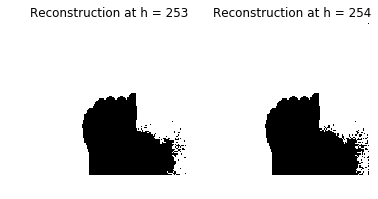

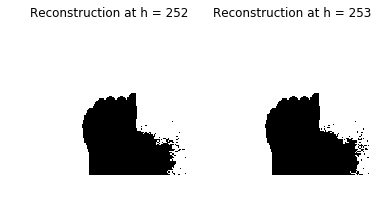

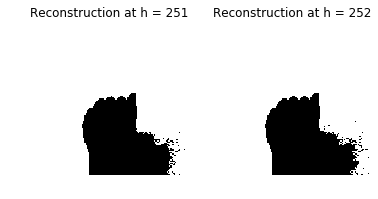

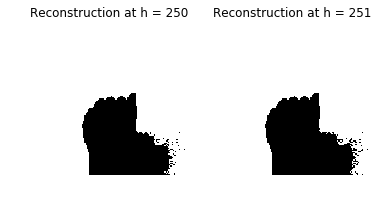

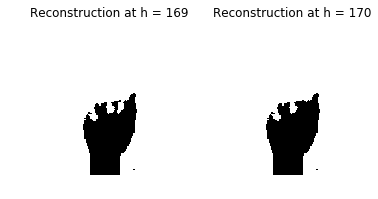

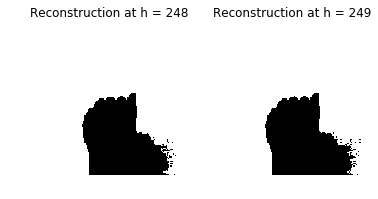

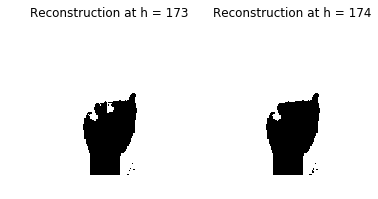

In [1]:
# This makes plots appear in the notebook
%matplotlib inline 

import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

import time # Let's measure some processing times

import siamxt  

# Loading brain MR image
# img = np.asarray(Image.open("./Sample-images/brain_coronal.png"))
img = np.asarray(Image.open("./Triesch/bfritza1.pgm"))
print("Image dimensions: %dx%d pixels" %img.shape)


#Displaying the original image
fig = plt.figure()
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.title("Original image")


#Structuring element with connectivity-8
Bc = np.ones((3,3),dtype = bool)
# Bc = np.array(((0,1,0),(1,0,1),(0,1,0)),dtype=bool)
# Building the max-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)

#Hand-picked regional maxima
x,y = 71,111
# x, y = 1, 1

# Node corresponding to a regional maximum
node = mxt.node_index[x,y]

# Extracting area attribute from NA
area = mxt.node_array[3,:]

# Area signature computation
levels,signature =  mxt.getSignature(area, node)

#Gradient of the area signature
gradient = signature[0:-1] - signature[1:]

# Display area signature
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.plot(levels,signature)
plt.grid()
plt.xlabel("Gray-level")
plt.ylabel("Area")
plt.title("Area signature")


# Display gradient of the area signature
plt.subplot(122)
plt.grid()
plt.plot(levels[0:-1],gradient)
plt.xlabel("Gray-level")
plt.ylabel("Gradient")
plt.title("Gradient signature")


# Selecting the second peak of the gradient
for i in range(10):
    index = np.argsort(gradient)[::-1][i]

    #reconstructing the node corresponding to the peak (largest area)
    area1 = signature[index]
    node1 = np.where(mxt.node_array[3,:] == area1)[0][0]
    cc1 = mxt.recConnectedComponent(node1)

    #reconstructing the node corresponding to the peak (smaller area)
    area2 = signature[index + 1]
    node2 = np.where(mxt.node_array[3,:] == area2)[0][0]
    cc2 = mxt.recConnectedComponent(node2)


    #Displaying the nodes reconstructed    
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(cc1, cmap='Greys_r')
    plt.axis('off')
    plt.title("Reconstruction at h = %d" %mxt.node_array[2,node1])
    plt.subplot(122)
    plt.imshow(cc2, cmap='Greys_r')
    plt.axis('off')
    plt.title("Reconstruction at h = %d" %mxt.node_array[2,node2])